<a href="https://colab.research.google.com/github/ashwarytripath/Encryptix_taskno3/blob/main/SalesPredictionusingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
sales=pd.read_csv('advertising.csv')

In [2]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X = sales[['TV', 'Radio', 'Newspaper']]
y = sales['Sales']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Accuracy of the model: {accuracy:.2f}%')

# Optional: Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 2.9077569102710896
R^2 Score: 0.9059011844150826
Accuracy of the model: 90.59%
           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


In [16]:
import matplotlib.pyplot as plt


In [17]:
intercept = model.intercept_
coefficients = model.coef_
print(f'Linear Equation: y = {intercept:.2f} + {coefficients[0]:.2f}*TV + {coefficients[1]:.2f}*Radio + {coefficients[2]:.2f}*Newspaper')

Linear Equation: y = 4.71 + 0.05*TV + 0.10*Radio + 0.00*Newspaper


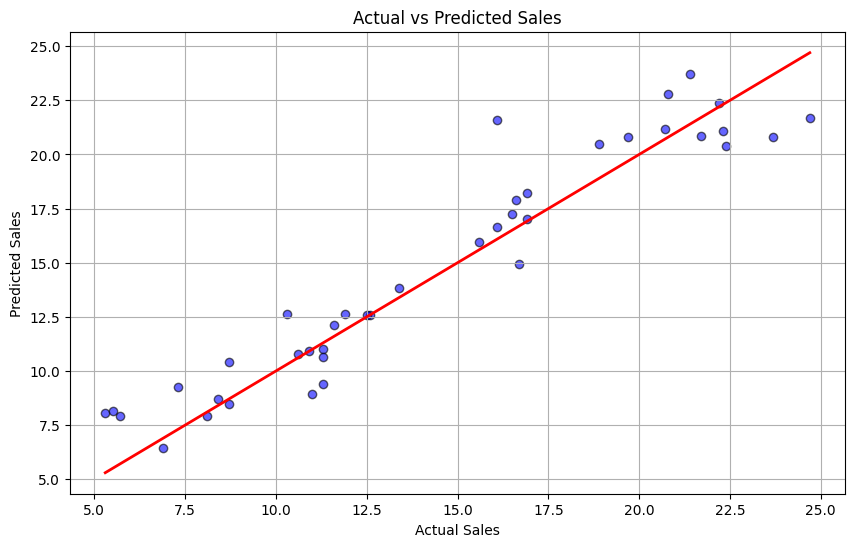

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


In [18]:
# Visualizing the Linear Regression model
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted sales
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

# Optional: Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)